In [9]:
ways <- c( 0 , 3 , 8 , 9 , 0 )
ways/sum(ways)

[1] 0.00 0.15 0.40 0.45 0.00

In [10]:
dbinom(6, size = 9, prob = 0.5)

[1] 0.1640625

## __Grid Approximation:__

In [11]:
## grid approximation in the W/L case
grid.approx <- function(grid_size = 20,
prior_func = function(x) rep(1, length(x))){
# define grid of p's
p_grid <- seq(from=0, to=1, length.out=grid_size)

# definbe priors (initially all 1)
prior <- prior_func(p_grid)

# compute likelihood for each p
# based on W ~ Binomial(N, p) where there were 6 Ws out of 9
likelihood <- dbinom(6, size=9, prob=p_grid)

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum(unstd.posterior)

return(list(p_grid, posterior))
}

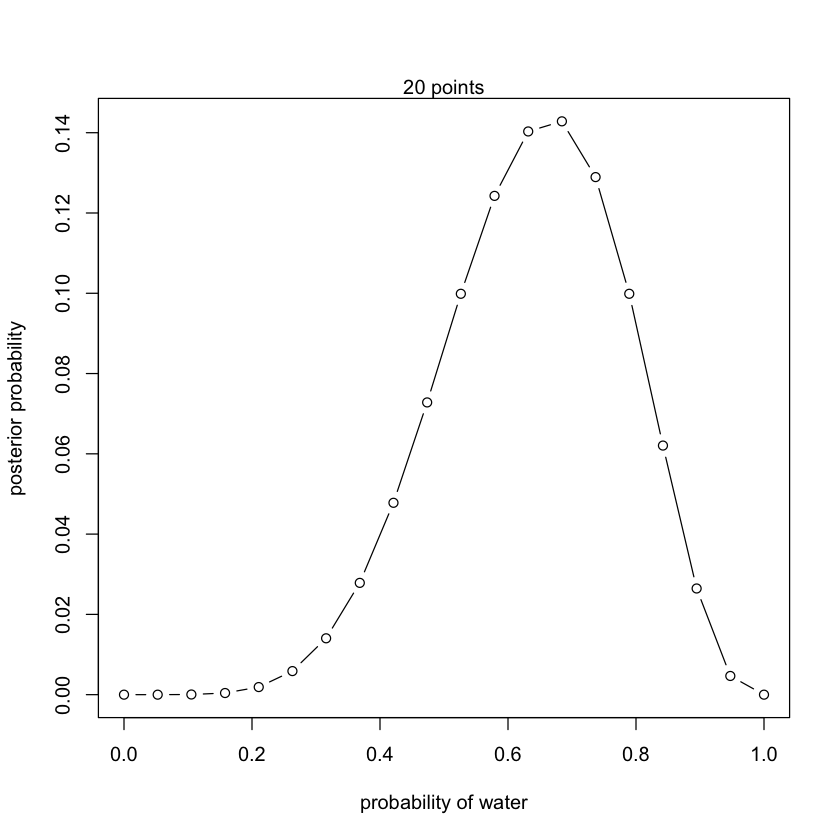

In [12]:
# UNIFORM PRIOR
# calculate posterior
output <- grid.approx(grid_size = 20)

## display posterior
plot( output[[1]] , output[[2]] , type="b" ,
xlab="probability of water" , ylab="posterior probability" )
mtext( paste0(length(output[[1]])," points"))

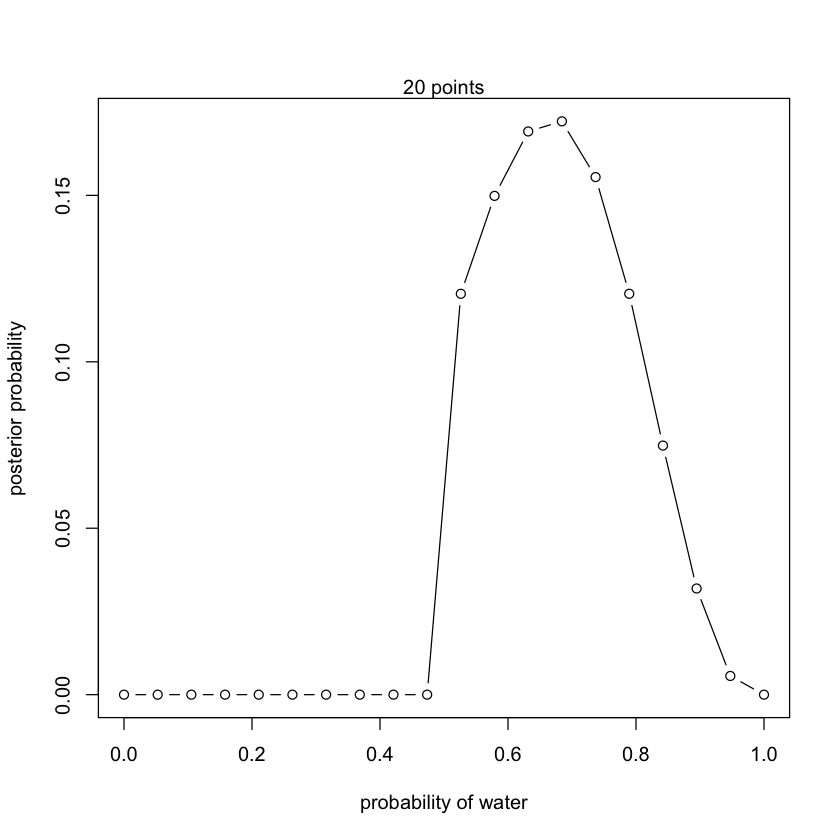

In [13]:
# BINARY PRIOR
# calculate posterior
output <- grid.approx(prior_func = function(x) ifelse(x < 0.5, 0, 1))

## display posterior
plot( output[[1]] , output[[2]] , type="b" ,
xlab="probability of water" , ylab="posterior probability" )
mtext( paste0(length(output[[1]])," points"))


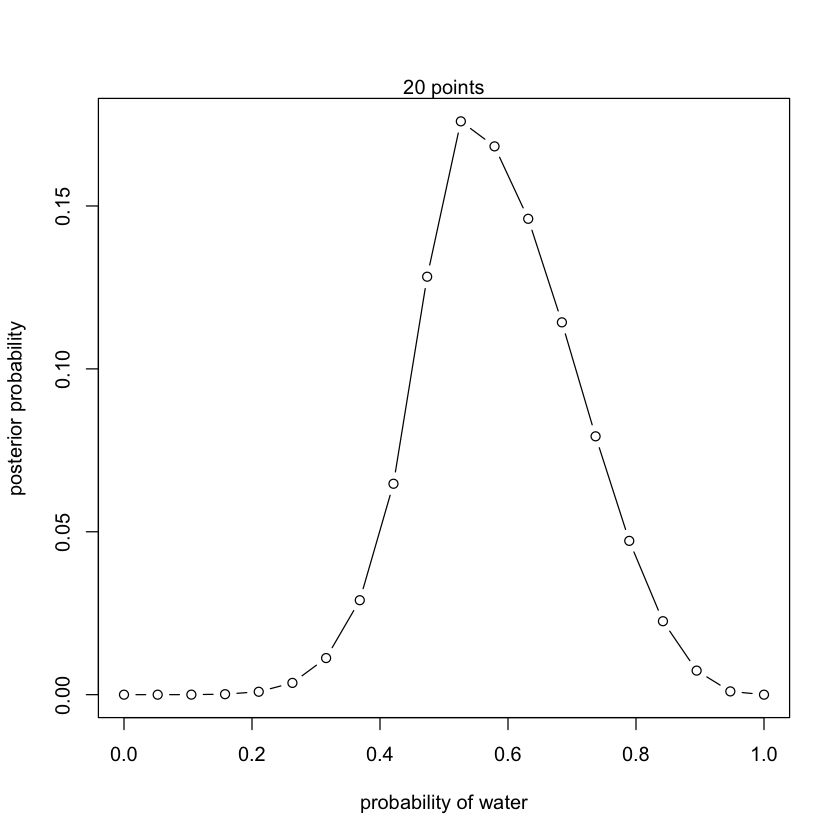

In [14]:
# ABS PRIOR
# calculate posterior
output <- grid.approx(prior_func = function(x) exp(-5*abs(x - 0.5)))

## display posterior
plot( output[[1]] , output[[2]] , type="b" ,
xlab="probability of water" , ylab="posterior probability" )
mtext( paste0(length(output[[1]])," points"))

## __Quadratic Approximation:__

In [15]:
library(rethinking)

In [16]:
set.seed(1)
# using quap() function in rethinking
globe.qa <- quap(
    alist(
        W ~ dbinom(W+L, p), # binomial likelihood
        p ~ dunif(0,1)     # uniform prior
    ),
    data = list(W=6, L=3)
)

# display summary of quadratic approximation
precis(globe.qa)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
p,0.6666664,0.1571338,0.4155362,0.9177966


Posterior mean value of p is `p = 0.67`


Curvature is `sd`


Also gives 89 percentile interval

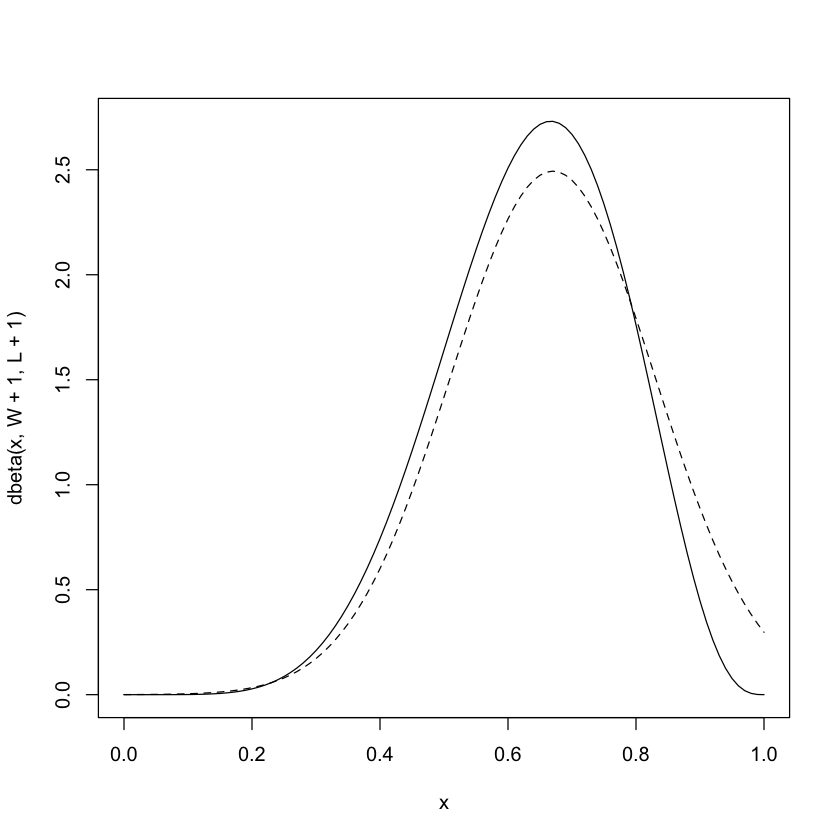

In [17]:
## Let's compare to real posterior (which we know)
# analytical calculation
W <- 6
L <- 3
curve( dbeta( x , W+1 , L+1 ) , from=0 , to=1 )
# quadratic approximation
curve( dnorm( x , 0.67 , 0.16 ) , lty=2 , add=TRUE )

## __Markov chain Monte Carlo__:

In [20]:
# metropolis algorithm
n_samples <- 1000
p <- rep( NA , n_samples )
p[1] <- 0.5
W <- 6
L <- 3
for ( i in 2:n_samples ) {
    p_new <- rnorm( 1 , p[i-1] , 0.1 )
    if ( p_new < 0 ) p_new <- abs( p_new )
    if ( p_new > 1 ) p_new <- 2 - p_new
    q0 <- dbinom( W , W+L , p[i-1] )
    q1 <- dbinom( W , W+L , p_new )
    p[i] <- ifelse( runif(1) < q1/q0 , p_new , p[i-1] )
}

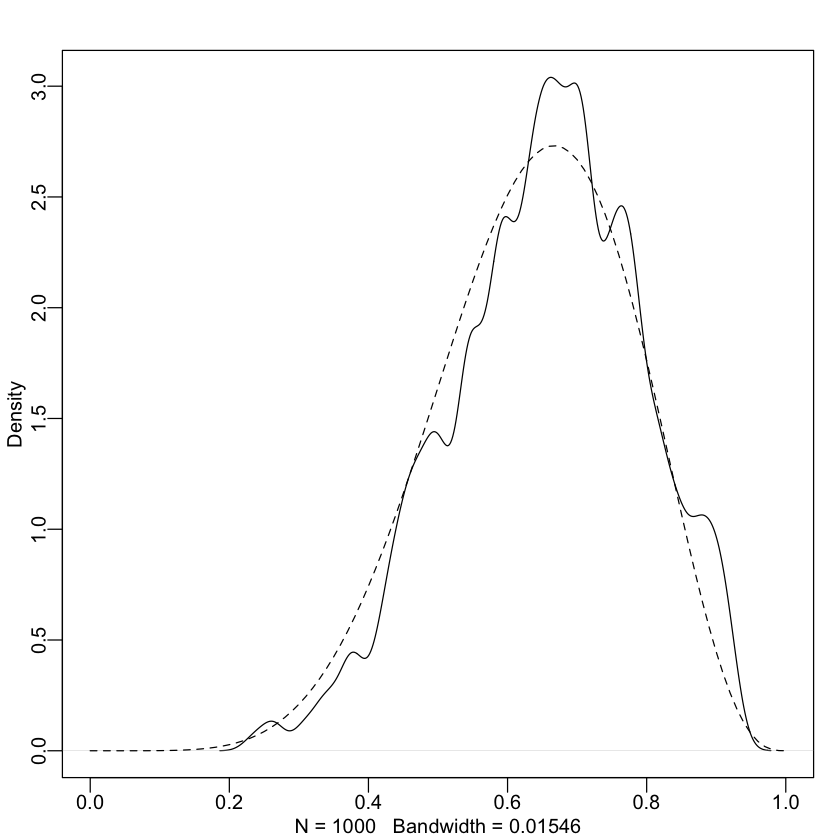

In [21]:
# comparing to analytical result
dens( p , xlim=c(0,1) )
curve( dbeta( x , W+1 , L+1 ) , lty=2 , add=TRUE )